# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 7</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


## Missão: Analisar o Comportamento de Compra de Consumidores.

## Nível de Dificuldade: Alto

In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
pd.__version__

'1.2.4'

In [4]:
np.__version__

'1.20.1'

In [5]:
# Carrega o arquivo
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


## Contagem de Compradores

In [6]:
# Localiza as colunas relacionadas aos consumidores 
info_consumidores = purchase_file.loc[:, ["Login", "Idade", "Sexo"]]
info_consumidores.head()

,Login,Idade,Sexo
0,Aelalis34,38,Masculino
1,Eolo46,21,Masculino
2,Assastnya25,34,Masculino
3,Pheusrical25,21,Masculino
4,Aela59,23,Masculino


In [7]:
# Dropa as duplicatas na coluna de Login
info_consumidores = info_consumidores.drop_duplicates()
info_consumidores.head()

,Login,Idade,Sexo
0,Aelalis34,38,Masculino
1,Eolo46,21,Masculino
2,Assastnya25,34,Masculino
3,Pheusrical25,21,Masculino
4,Aela59,23,Masculino


In [8]:
# Conta as linhas para total de consumidores
total_consumidores = info_consumidores["Login"].count()
total_consumidores

573

In [9]:
# Apresenta os resultados em formato DataFrame
consumidores = pd.DataFrame({"Total de consumidores": [total_consumidores]})
consumidores

,Total de consumidores
0,573


## Análise Geral de Compras

In [10]:
# Análise geral das compras
itens_exclusivos = len(purchase_file["Item ID"].unique())
media_compras = purchase_file["Valor"].mean()
total_compras = purchase_file["Valor"].count()
rendimento = purchase_file["Valor"].sum()

In [11]:
# Apresenta a análise em formato DataFrame
analise_compras = pd.DataFrame({"Número de itens exclusivos": [itens_exclusivos],
                                "Preço médio de compra": [media_compras],
                                "Número total de compras": [total_compras],
                                "Rendimento total": [rendimento]
                               })

analise_compras = analise_compras.round(2)
analise_compras["Preço médio de compra"] = analise_compras["Preço médio de compra"].map("${:,.2f}".format)
analise_compras["Rendimento total"] = analise_compras["Rendimento total"].map("${:,.2f}".format)
analise_compras

,Número de itens exclusivos,Preço médio de compra,Número total de compras,Rendimento total
0,183,$2.93,780,"$2,286.33"


## Informações Demográficas Por Gênero

In [12]:
# Contagem dos valores na coluna de genêros
compradores_genero = info_consumidores["Sexo"].value_counts()
compradores_genero

Masculino                465
Feminino                 100
Outro / Não Divulgado      8
Name: Sexo, dtype: int64

In [13]:
# Cálculo da porcentagem
porcentagem = (compradores_genero / total_consumidores) * 100
porcentagem

Masculino                81.151832
Feminino                 17.452007
Outro / Não Divulgado     1.396161
Name: Sexo, dtype: float64

In [14]:
# Apresenta a análise em formato DataFrame
analise_genero = pd.DataFrame({"Sexo": compradores_genero,
                               "Porcentagem": porcentagem
                              })

analise_genero = analise_genero.round(1)
#analise_genero["Porcentagem"] = analise_genero["Porcentagem"].map("{:,.1f}%".format)
analise_genero

,Sexo,Porcentagem
Masculino,465,81.2
Feminino,100,17.5
Outro / Não Divulgado,8,1.4


In [15]:
# Ajusta os labels
labels = [i + ' ' + '[' + str(analise_genero["Porcentagem"][i]) + '%' + ']'  for i in analise_genero.index]

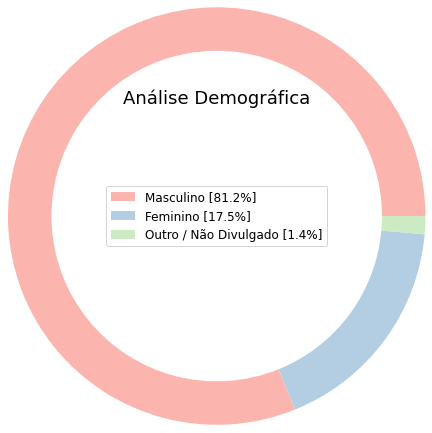

In [16]:
# Plot

# Mapa de cores
cs = cm.Pastel1(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(analise_genero["Porcentagem"], labeldistance = 0, radius = 2.4, colors = cs, wedgeprops = dict(width = 0.5))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Análise Demográfica", fontdict = {'fontsize': 18,'fontweight': 18, 'verticalalignment': 'center_baseline', 'horizontalalignment': 'center'}, loc = 'center')
plt.show()

## Análise de Compras por Gênero

In [17]:
# Agrupamentos
numero_compras_genero = purchase_file.groupby(["Sexo"]).count()["Valor"].rename("Número de compras")
preco_medio_genero = purchase_file.groupby(["Sexo"]).mean()["Valor"].rename("Preço médio de compra")
total_compras_genero = purchase_file.groupby(["Sexo"]).sum()["Valor"].rename("Total de compras")

total_compras_normalizado = total_compras_genero / analise_genero["Sexo"]
preco_medio_genero

Sexo
Feminino                 2.815515
Masculino                2.950521
Outro / Não Divulgado    3.249091
Name: Preço médio de compra, dtype: float64

In [18]:
analise_compras_genero = pd.DataFrame({"Número de compras": numero_compras_genero,
                                       "Preço médio de compra": preco_medio_genero,
                                       "Total de compras": total_compras_genero,
                                       "Total de compras normalizado": total_compras_normalizado
                                      })

analise_compras_genero = analise_compras_genero.round(2)
analise_compras_genero["Preço médio de compra"] = analise_compras_genero["Preço médio de compra"].map("${:,.2f}".format)
analise_compras_genero["Total de compras"] = analise_compras_genero["Total de compras"].map("${:,.2f}".format)
analise_compras_genero["Total de compras normalizado"] = analise_compras_genero["Total de compras normalizado"].map("${:,.2f}".format)
analise_compras_genero

,Número de compras,Preço médio de compra,Total de compras,Total de compras normalizado
Feminino,136,$2.82,$382.91,$3.83
Masculino,633,$2.95,"$1,867.68",$4.02
Outro / Não Divulgado,11,$3.25,$35.74,$4.47


In [19]:
bins_idade = [0, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 100]
range_idade = ["Menos de 15 anos", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "Mais de 40 anos"]

purchase_file["Range de Idades"] = pd.cut(purchase_file["Idade"], bins_idade, labels = range_idade)

numero_consumidores_idade = purchase_file["Range de Idades"].value_counts()
preco_medio_idade = purchase_file.groupby(["Range de Idades"]).mean()["Valor"]
total_compras_idade = purchase_file.groupby(["Range de Idades"]).sum()["Valor"]

porcentagem_idade = (numero_consumidores_idade / total_consumidores) * 100

analise_idade = pd.DataFrame({"Quantidade": numero_consumidores_idade, 
                              "Porcentagem": porcentagem_idade, 
                              "Valor Unitário": preco_medio_idade, 
                              "Total de compras": total_compras_idade})

analise_idade["Porcentagem"] = analise_idade["Porcentagem"].map("{:,.1f}%".format)
analise_idade["Valor Unitário"] = analise_idade["Valor Unitário"].map("${:,.2f}".format)
analise_idade["Total de compras"] = analise_idade["Total de compras"].map("${:,.2f}".format)
analise_idade

,Quantidade,Porcentagem,Valor Unitário,Total de compras
Menos de 15 anos,63,11.0%,$2.86,$180.41
15 a 19,133,23.2%,$2.91,$386.42
20 a 24,336,58.6%,$2.91,$978.77
25 a 29,125,21.8%,$2.96,$370.33
30 a 34,64,11.2%,$3.08,$197.25
35 a 39,42,7.3%,$2.84,$119.40
Mais de 40 anos,17,3.0%,$3.16,$53.75


## Consumidores Mais Populares (Top 5)

In [20]:
# Implemente aqui sua solução
numero_compras_login = purchase_file.groupby(["Login"]).count()["Valor"].rename("Número de compras")
preco_medio_login = purchase_file.groupby(["Login"]).mean()["Valor"].rename("Preço médio de compra")
total_compras_login = purchase_file.groupby(["Login"]).sum()["Valor"].rename("Total de compras")

consumidores_populares = pd.DataFrame({"Número de compras": numero_compras_login,
                                       "Preço médio de compra": preco_medio_login,
                                       "Total de compras": total_compras_login,
                                      })

consumidores_populares = consumidores_populares.round(2)
consumidores_populares["Preço médio de compra"] = consumidores_populares["Preço médio de compra"].map("${:,.2f}".format)
consumidores_populares["Total de compras"] = consumidores_populares["Total de compras"].map("${:,.2f}".format)
consumidores_populares.sort_values(by = "Total de compras", ascending = False).head()

,Número de compras,Preço médio de compra,Total de compras
Login,,,
Qarwen67,4,$2.49,$9.97
Sondim43,3,$3.13,$9.38
Tillyrin30,3,$3.06,$9.19
Lisistaya47,3,$3.06,$9.19
Tyisriphos58,2,$4.59,$9.18


## Itens Mais Populares

In [21]:
numero_compras_itens = purchase_file.groupby(["Nome do Item"]).count()["Valor"].rename("Número de compras")
preco_medio_itens = purchase_file.groupby(["Nome do Item"]).mean()["Valor"].rename("Preço médio de compra")
total_compras_itens = purchase_file.groupby(["Nome do Item"]).sum()["Valor"].rename("Total de compras")

itens_populares = pd.DataFrame({"Número de compras": numero_compras_itens,
                                "Preço médio de compra": preco_medio_itens,
                                "Total de compras": total_compras_itens,
                               })

itens_populares["Preço médio de compra"] = itens_populares["Preço médio de compra"].map("${:,.2f}".format)
itens_populares["Total de compras"] = itens_populares["Total de compras"].map("${:,.2f}".format)
itens_populares.sort_values(by = "Número de compras", ascending = False).head()

,Número de compras,Preço médio de compra,Total de compras
Nome do Item,,,
Final Critic,14,$2.76,$38.60
Arcane Gem,11,$2.23,$24.53
"Betrayal, Whisper of Grieving Widows",11,$2.35,$25.85
Stormcaller,10,$3.46,$34.65
Woeful Adamantite Claymore,9,$1.24,$11.16


## Itens Mais Lucrativos

In [22]:
numero_compras_lucrativos = purchase_file.groupby(["Nome do Item"]).count()["Valor"].rename("Número de compras")
preco_medio_lucrativos = purchase_file.groupby(["Nome do Item"]).mean()["Valor"].rename("Preço médio de compra")
total_compras_lucrativos = purchase_file.groupby(["Nome do Item"]).sum()["Valor"].rename("Total de compras")

itens_lucrativos = pd.DataFrame({"Número de compras": numero_compras_lucrativos,
                                "Preço médio de compra": preco_medio_lucrativos,
                                "Total de compras": total_compras_lucrativos,
                                })

itens_lucrativos["Total compras"] = itens_lucrativos["Total de compras"]
itens_lucrativos["Preço médio de compra"] = itens_lucrativos["Preço médio de compra"].map("${:,.2f}".format)
itens_lucrativos["Total de compras"] = itens_lucrativos["Total de compras"].map("${:,.2f}".format)
display(itens_lucrativos.sort_values(by = "Total compras", ascending = False).head()[\
                    ["Número de compras", "Preço médio de compra", "Total de compras"]])

,Número de compras,Preço médio de compra,Total de compras
Nome do Item,,,
Final Critic,14,$2.76,$38.60
Retribution Axe,9,$4.14,$37.26
Stormcaller,10,$3.46,$34.65
Spectral Diamond Doomblade,7,$4.25,$29.75
Orenmir,6,$4.95,$29.70
